In [26]:
import pandas as pd
import numpy as np

data_cliente = {
    'Fecha': ['2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03', '2023-01-04', 
              '2023-01-05', '2023-01-06', '2023-02-01', '2023-02-02', '2023-02-03', 
              '2023-02-04', '2023-02-05', '2023-02-05', '2023-02-06', np.nan],
    'Cliente': ['Nuevo', 'Recurrente', 'Recurrente', 'Nuevo', 'Nuevo', 
                'Recurrente', 'Nuevo', 'Nuevo', 'Recurrente', 'Nuevo', 
                'Nuevo', 'Recurrente', 'Recurrente', 'Nuevo', 'Nuevo'],
    'Región': ['Norte', 'Sur', 'Sur ', 'Este', 'Oeste', 
               'Norte', 'Este', 'Oeste', 'Sur', 'Norte', 
               'Sur', 'Oeste', 'Oeste', 'Este', np.nan],
    'Ventas Totales': [200, 150, 150, 100, 250, 175, 125, 300, 225, 180, 160, 210, 210, 140, 100]
}

df_cliente = pd.DataFrame(data_cliente)

#import ace_tools_open as tools; tools.display_dataframe_to_user(name="Datos de Ventas por Cliente y Región", dataframe=df_cliente)
df_cliente

,Fecha,Cliente,Región,Ventas Totales
0,2023-01-01,Nuevo,Norte,200
1,2023-01-02,Recurrente,Sur,150
2,2023-01-02,Recurrente,Sur,150
3,2023-01-03,Nuevo,Este,100
4,2023-01-04,Nuevo,Oeste,250
5,2023-01-05,Recurrente,Norte,175
6,2023-01-06,Nuevo,Este,125
7,2023-02-01,Nuevo,Oeste,300
8,2023-02-02,Recurrente,Sur,225
9,2023-02-03,Nuevo,Norte,180


In [42]:
df_cliente['Región'] = df_cliente['Región'].str.strip()
df_cliente = df_cliente.dropna()
df_cliente = df_cliente.drop_duplicates()
df_cliente['Fecha'] = pd.to_datetime(df_cliente['Fecha'])


In [55]:
df_cliente

,Fecha,Cliente,Región,Ventas Totales,Mes,Día de la semana
0,2023-01-01,Nuevo,Norte,200,January,Sunday
1,2023-01-02,Recurrente,Sur,150,January,Monday
3,2023-01-03,Nuevo,Este,100,January,Tuesday
4,2023-01-04,Nuevo,Oeste,250,January,Wednesday
5,2023-01-05,Recurrente,Norte,175,January,Thursday
6,2023-01-06,Nuevo,Este,125,January,Friday
7,2023-02-01,Nuevo,Oeste,300,February,Wednesday
8,2023-02-02,Recurrente,Sur,225,February,Thursday
9,2023-02-03,Nuevo,Norte,180,February,Friday
10,2023-02-04,Nuevo,Sur,160,February,Saturday


In [43]:
df_cliente['Mes'] = df_cliente['Fecha'].dt.month_name()
df_cliente['Día de la semana'] = df_cliente['Fecha'].dt.day_name()

In [44]:
ventasTipoCliente = df_cliente.groupby('Cliente')['Ventas Totales'].agg(['sum', 'mean']).reset_index()
ventasRegion = df_cliente.groupby('Región')['Ventas Totales'].agg(['sum', 'mean']).reset_index()

In [57]:
#ventasTipoCliente
ventasRegion

,Región,sum,mean
0,Este,365,121.666667
1,Norte,555,185.000000
2,Oeste,760,253.333333
3,Sur,535,178.333333


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13580\487969429.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


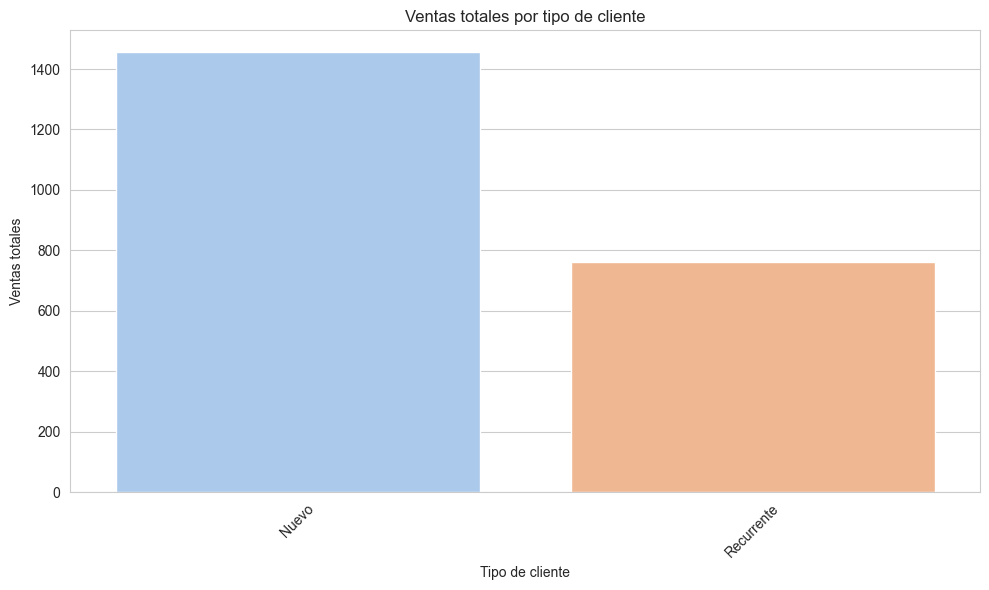

In [50]:
# Diagramas de barras de ventas totales por tipo de cliente
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.barplot(
    data= ventasTipoCliente,
    x='Cliente',
    y= 'sum',
    palette='pastel'
)

plt.title('Ventas totales por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13580\1141559049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


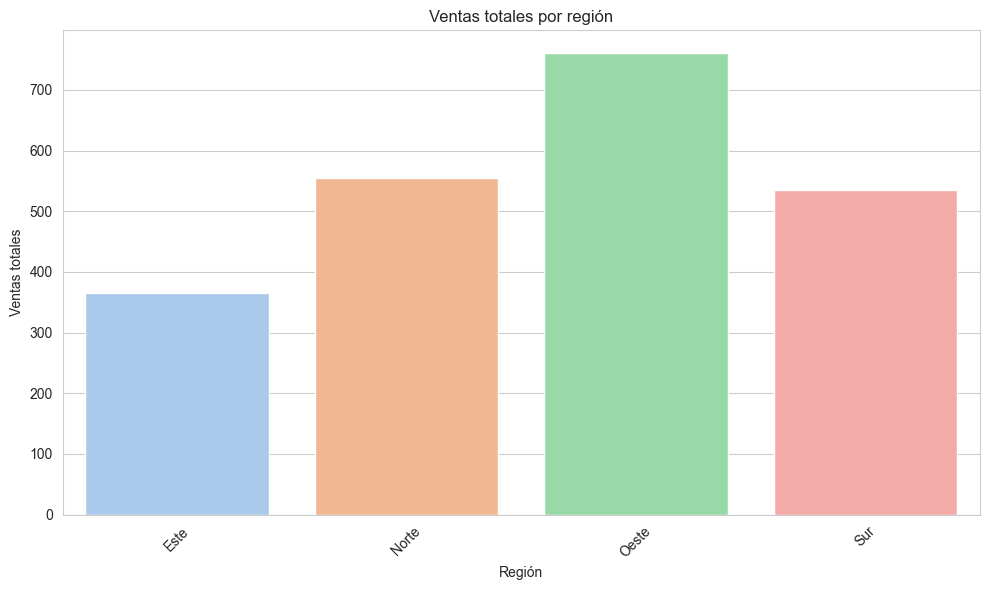

In [51]:
# Diagrama de barras de las ventas totales por región
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.barplot(
    data=ventasRegion,
    x='Región',
    y='sum',
    palette='pastel'
)

plt.title('Ventas totales por región')
plt.xlabel('Región')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

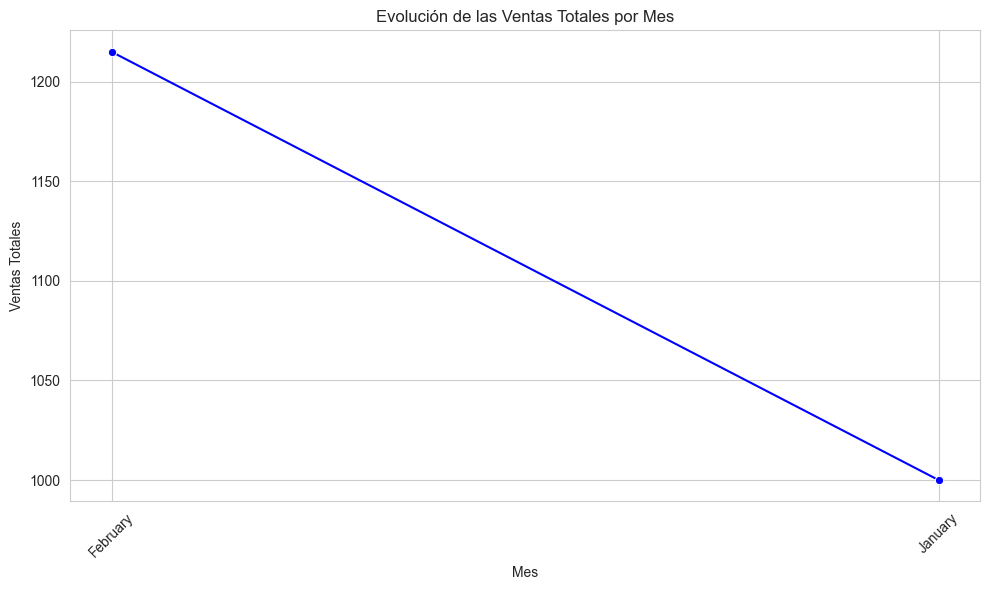

In [54]:
ventas_por_mes = df_cliente.groupby('Mes')['Ventas Totales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_por_mes, x='Mes', y='Ventas Totales', marker='o', color='b')

plt.title('Evolución de las Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True)
plt.tight_layout()  # Ajuste del diseño

# Mostrar gráfico
plt.show()